In [2]:
from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)
%matplotlib inline

### Load and combine data
- Insert zeros as needed to match other files*** i.e. 1033 --> 01033

In [8]:
target_crop = "soybean"
data_dir = '/Users/adamszabunio/Desktop/NASS_raw_data/{}/'.format(target_crop)
soy_yields = pd.read_csv(join(data_dir, 'soybean_historical_yields_1995_2017.csv'), index_col=0)
soy_yields2 = pd.read_csv(join(data_dir, 'soybean_historical_yields_1970_1994.csv'), index_col=0)
soy_yields = soy_yields.append(soy_y2)
soy_yields.reset_index(inplace=True, drop=True)
soy_yields.fips_code = soy_yields.fips_code.astype(str).apply(lambda x: x.zfill(5))

print("Shape:", soy_yields.shape)
soy_yields.head()

Shape: (78815, 7)


,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
0,01033,AL,2017,48.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
1,01033,AL,2016,31.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
2,01033,AL,2015,44.1,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
3,01033,AL,2014,44.0,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"
4,01033,AL,2013,44.2,COLBERT,NORTHERN VALLEY,"ALABAMA, NORTHERN VALLEY, COLBERT"


In [6]:
ts_df = soy_yields.pivot(index='fips_code', columns='year', values='nassyield')
ts_df

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,25.0,27.0,18.2,17.6,20.0,15.9,22.9,30.0,14.0,21.6,11.8,19.2,22.6,19.4,24.4,23.8,22.8,15.3,24.2,15.2,12.3,17.8,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,16.9,26.0,NaN,41.2,NaN,NaN,NaN
01003,27.0,27.0,20.4,25.9,26.0,27.0,30.0,21.1,23.0,17.5,24.6,25.7,26.5,30.2,26.0,24.8,25.6,25.0,27.7,22.0,19.0,25.9,30.0,30.1,28.6,29.0,35.0,25.0,22.0,28.0,20.0,34.0,27.0,31.0,31.0,NaN,38.0,38.0,41.5,40.5,40.0,37.0,41.0,41.9,43.8,43.4,41.8
01005,23.0,26.0,12.1,19.1,28.0,19.0,18.9,20.9,21.5,28.5,15.3,20.9,27.5,19.3,18.1,26.7,18.0,18.0,25.0,22.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.1,NaN
01007,21.0,25.0,20.8,17.8,24.0,22.1,27.0,22.1,22.0,26.9,19.5,24.3,25.3,17.9,22.9,22.3,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01009,24.0,25.0,19.8,16.6,26.0,30.0,32.0,20.0,28.0,29.5,14.4,25.1,30.5,15.9,18.4,29.7,26.5,19.0,25.1,27.3,16.8,25.0,35.0,28.2,43.5,21.0,37.0,28.0,20.0,20.0,20.0,35.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.6,NaN,41.4,49.7,33.9,43.8,25.0
01011,24.0,25.0,20.3,22.3,21.0,21.0,20.0,20.0,22.0,26.4,12.2,20.9,23.0,22.3,21.8,26.1,21.0,16.5,18.4,16.9,16.7,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.2,36.5,NaN,NaN
01013,21.0,26.0,12.6,20.1,23.0,20.0,20.0,15.0,20.0,24.1,11.8,23.1,24.0,17.7,24.0,25.3,32.1,15.6,24.2,16.1,16.5,23.9,28.0,24.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01015,23.0,25.0,21.1,19.2,22.0,23.0,24.0,25.3,21.0,26.8,14.1,23.1,21.5,18.4,22.6,32.1,24.0,15.0,23.3,23.0,18.2,23.8,35.7,19.7,39.0,23.0,35.0,27.0,25.0,18.0,15.0,35.0,21.0,41.0,39.0,31.0,18.0,18.0,NaN,38.0,17.1,28.2,36.1,44.2,34.0,NaN,NaN
01017,21.0,23.0,18.7,23.0,19.0,25.0,21.0,16.0,16.0,NaN,15.7,19.2,24.4,21.1,18.1,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ts_df.describe()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,1450.000000,1446.000000,1715.000000,1752.000000,1810.000000,1784.000000,1781.000000,1829.000000,1848.000000,1872.000000,1856.000000,1822.000000,1798.000000,1856.000000,1861.000000,1840.000000,1802.000000,1764.000000,1799.000000,1810.000000,1756.000000,1721.000000,1721.000000,1658.000000,1639.000000,1599.000000,1609.000000,1660.000000,1660.000000,1609.000000,1637.000000,1621.00000,1603.000000,1597.000000,1650.000000,1622.000000,1583.000000,1509.000000,1306.000000,1382.000000,1496.000000,1419.000000,1455.000000,1367.000000,1430.000000,1306.000000,1352.000000
mean,24.025517,25.230567,24.534111,24.653082,22.514641,25.463397,23.341606,27.033461,26.040152,29.339476,23.000808,27.825576,28.933593,23.650593,26.371843,30.378533,29.079911,29.319785,25.704669,29.213591,29.812130,31.402673,33.414178,29.660676,37.505247,31.660851,34.693163,34.255542,33.049277,31.231075,33.776176,35.78322,32.730069,33.575329,39.315636,38.249630,38.453001,36.376143,37.295942,41.890738,39.705682,38.943058,39.311478,42.530944,45.242098,44.996248,47.648743
std,5.828479,5.894049,6.494447,5.224763,4.549158,5.705164,6.693615,7.478861,7.032220,5.602669,9.500465,7.582111,6.551290,7.628066,7.079226,7.449904,8.735822,8.931632,6.209811,7.664095,9.891195,8.114678,7.820376,9.409994,7.886519,8.615471,7.139126,8.951279,11.024377,10.745667,10.725772,8.91073,10.270704,7.940000,9.600980,10.230961,11.059988,11.886812,8.296603,8.963216,11.125876,10.975471,10.201738,9.331013,9.397023,10.582468,11.431465
min,9.000000,10.000000,9.500000,8.000000,5.500000,10.500000,5.000000,10.000000,8.000000,13.000000,6.300000,8.600000,10.500000,8.400000,7.900000,8.000000,1.700000,7.000000,4.000000,6.000000,5.400000,3.000000,7.000000,5.000000,10.000000,8.600000,12.500000,11.300000,9.200000,6.000000,8.000000,8.40000,6.000000,2.900000,7.000000,0.700000,5.000000,7.000000,12.000000,9.500000,9.000000,5.100000,3.600000,13.700000,17.600000,13.800000,8.200000
25%,20.000000,22.000000,20.000000,21.000000,19.500000,21.600000,18.000000,21.000000,20.800000,25.000000,14.800000,22.200000,24.500000,17.500000,21.500000,25.000000,22.000000,22.000000,22.000000,24.000000,21.975000,25.500000,28.000000,22.000000,32.000000,25.000000,30.000000,27.875000,24.000000,22.000000,25.900000,30.00000,25.000000,28.400000,33.000000,30.925000,30.950000,27.200000,31.500000,36.500000,31.100000,32.000000,33.400000,36.350000,38.700000,37.400000,39.800000
50%,24.000000,25.000000,24.000000,24.000000,22.600000,24.950000,23.000000,26.000000,25.900000,29.000000,22.000000,27.000000,28.800000,22.500000,26.400000,30.000000,29.500000,29.650000,25.700000,29.150000,31.000000,31.000000,33.800000,30.000000,37.000000,31.100000,34.700000,34.500000,33.400000,30.500000,35.800000,36.00000,32.000000,34.000000,40.000000,38.800000,40.000000,37.000000,37.000000,42.500000,41.400000,40.000000,40.500000,43.500000,46.100000,46.350000,49.100000
75%,28.000000,29.000000,29.000000,28.000000,25.500000,28.700000,28.000000,33.000000,31.000000,33.000000,31.000000,33.000000,33.500000,29.300000,31.100000,35.800000,36.000000,36.200000,29.300000,34.900000,37.900000,37.000000,39.100000,37.000000,43.000000,38.100000,40.000000,41.000000,42.000000,40.000000,42.000000,42.00000,40.000000,39.000000,46.500000,46.000000,47.000000,46.100000,43.000000,48.000000,48.600000,46.300000,46.700000,49.500000,52.300000,52.975000,56.425000
max,40.000000,41.000000,42.000000,40.000000,40.000000,43.000000,40.500000,44.700000,43.800000,45.000000,45.800000,49.300000,45.000000,43.300000,47.300000,52.500000,48.500000,50.800000,50.000000,49.000000,55.700000,56.000000,53.000000,54.800000,59.000000,53.500000,58.000000,57.000000,58.000000,60.000000,58.000000,59.00000,61.800000,64.400000,60.000000,65.000000,67.000000,62.000000,61.000000,68.000000,66.100000,68.500000

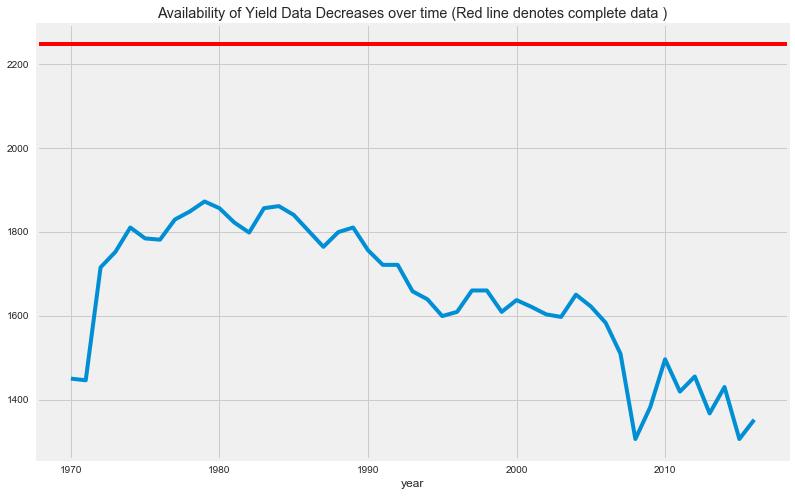

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.axhline(y=ts_df.shape[0], color='r', linestyle='-')
plt.title("Availability of Yield Data Decreases over time (Red line denotes complete data )")
ts_df.count().plot();

In [10]:
ts_df.T.describe()

fips_code,01001,01003,01005,01007,01009,01011,01013,01015,01017,01019,01021,01023,01025,01027,01029,01031,01033,01035,01037,01039,01041,01043,01045,01047,01049,01051,01053,01055,01057,01059,01061,01063,01065,01067,01069,01071,01073,01075,01077,01079,01081,01083,01085,01087,01089,01091,01093,01095,01097,01099,...,55041,55043,55045,55047,55049,55051,55053,55055,55057,55059,55061,55063,55065,55067,55069,55071,55073,55075,55077,55079,55081,55083,55087,55089,55091,55093,55095,55097,55099,55101,55103,55105,55107,55109,55111,55113,55115,55117,55119,55121,55123,55125,55127,55129,55131,55133,55135,55137,55139,55141
count,27.000000,46.000000,21.000000,17.000000,39.000000,24.000000,25.00000,44.000000,15.000000,46.000000,23.000000,17.000000,18.000000,7.000000,24.000000,30.000000,41.000000,34.000000,6.000000,38.000000,24.000000,46.000000,22.000000,40.000000,47.000000,31.000000,42.000000,44.000000,43.000000,34.000000,39.000000,26.000000,35.000000,29.000000,42.000000,46.000000,14.000000,32.000000,47.000000,46.00000,16.000000,47.000000,31.000000,29.000000,47.000000,29.000000,37.000000,44.000000,28.000000,33.000000,...,2.000000,47.000000,47.000000,47.000000,47.000000,4.000000,47.000000,47.000000,47.000000,46.000000,46.000000,47.000000,47.000000,36.000000,30.000000,47.000000,47.000000,41.000000,45.000000,45.000000,47.000000,47.000000,47.000000,45.000000,45.000000,47.000000,47.000000,45.000000,5.000000,47.000000,46.000000,47.000000,43.000000,47.000000,47.000000,29.000000,47.000000,47.000000,41.000000,46.000000,47.000000,2.000000,47.000000,37.000000,46.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,21.374074,29.684783,22.895238,22.352941,27.120513,22.741667,21.36400,25.625000,20.213333,26.330435,23.182609,23.723529,24.044444,20.785714,22.120833,24.053333,26.309756,24.932353,21.683333,25.694737,21.720833,28.326087,20.672727,23.792500,27.151064,23.148387,29.164286,26.363636,24.188372,25.273529,25.048718,20.750000,23.242857,22.948276,22.935714,25.265217,21.607143,21.896875,25.680851,26.56087,19.500000,27.580851,23.938710,23.462069,27.193617,22.062069,23.051351,24.350000,26.742857,26.669697,...,17.000000,42.840426,39.625532,34.485106,39.574468,23.000000,32.236170,38.700000,32.317021,37.117391,34.300000,34.529787,42.585106,28.300000,28.793333,35.029787,30.808511,30.929268,29.662222,31.962222,33.229787,30.876596,35.653191,34.946667,33.077778,34.885106,29.929787,30.804444,28.060000,37.327660,37.076087,40.227660,26.790698,32.095745,38.074468,24.637931,33.070213,35.465957,30.173171,33.817391,36.582979,30.500000,38.889362,25.405405,36.336957,36.372340,32.314894,33.057447,35.317021,32.738298
std,6.319664,7.188910,7.980193,2.834413,8.218566,7.732535,4.91756,7.732508,3.003775,9.086739,7.865439,3.319738,4.232121,3.818564,4.226519,9.172889,9.625923,6.477500,2.320704,7.484721,5.496242,10.135930,4.432476,8.360787,8.892446,6.716342,7.270113,8.853382,5.423108,7.934364,7.413248,4.727304,5.930147,4.979933,6.316715,7.315470,4.295519,5.574393,8.763478,9.84677,3.780653,9.148643,6.870938,7.744649,8.759452,5.468182,6.752145,7.617498,4.689739,7.229172,...,4.242641,11.091431,9.861001,11.262751,10.809345,7.788881,10.169507,9.202504,9.421260,7.964569,9.089921,10.836190,11.152812,7.893831,7.204689,8.801554,9.472473,8.795347,7.957395,7.752515,9.089959,9.023694,8.736153,8.635303,9.571047,10.304220,9.464118,9.630750,10.786937,8.058905,8.620626,9.091986,8.706041,10.065675,9.004020,9.147576,9.862532,9.004088,10.297573,8.973772,8.670071,12.020815,8.296601,8.984058,8.985701,8.790378,9.482294,9.881906,8.462277,10.490918
min,11.800000,17.500000,12.100000,17.800000,14.400000,12.200000,11.80000,14.100000,15.700000,14.700000,12.400000,19.400000,16.800000,15.000000,15.000000,12.200000,9.000000,12.700000,17.800000,10.900000,10.900000,13.000000,11.200000,12.000000,14.000000,10.900000,13.000000,12.100000,12.000000,11.400000,12.200000,11.300000,10.500000,12.700000,9.000000,13.000000,15.000000,11.500000,6.000000,12.00000,12.000000,8.000000,12.900000,12.500000,12.000000,12.400000,

In [11]:
complete_data = ts_df.T.count().value_counts()[47]
counties = ts_df.shape[0]
complete_data, counties, complete_data/counties

(659, 2248, 0.2931494661921708)

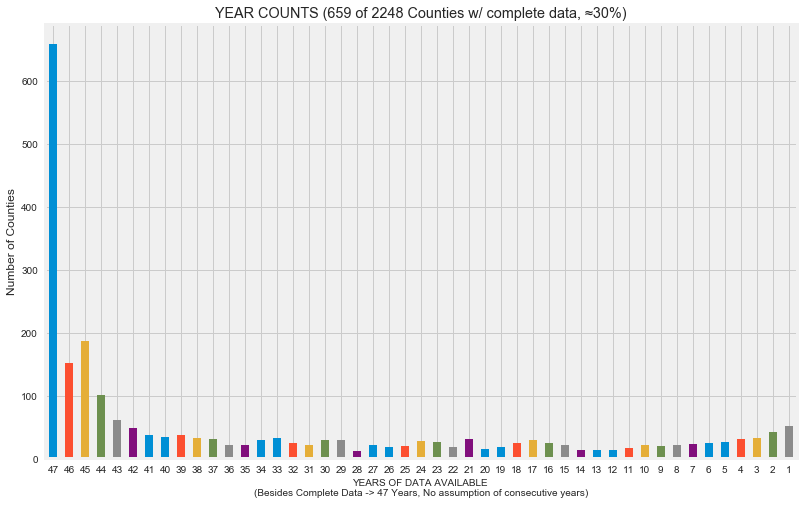

In [12]:
fig, ax= plt.subplots(figsize=(12, 8))

reverse_years = pd.Series(data=list(ts_df.T.count().value_counts().reset_index().sort_values(by="index",ascending=False)[0]), 
                          index=np.arange(1,48)[::-1])
reverse_years.plot(kind="bar", rot=0)
plt.title("YEAR COUNTS ({} of {} Counties w/ complete data, ≈30%)".format(complete_data, counties))
plt.ylabel("Number of Counties")
plt.xlabel("YEARS OF DATA AVAILABLE \n(Besides Complete Data -> 47 Years, No assumption of consecutive years)", 
           fontsize="medium");
# fig.savefig("images/soy_year_counts")

### Both Corn and Soy have 30% Complete Data 

# Everything Below is a copy of "corn_EDA.ipynb"

___

# Fips Code clash
- For years 1970 - 1986, fips_code -> 29193 
- For years 1987 - 2016, fips_code -> 29186

In [6]:
corn_yields[corn_yields.fips_code.isin(['29193', '29186'])].sort_values(by='year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
93703,29193,MO,1970,50.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93702,29193,MO,1971,77.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93701,29193,MO,1972,69.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93700,29193,MO,1973,77.7,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
93699,29193,MO,1974,53.7,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65038,29193,MO,1975,88.3,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65037,29193,MO,1976,88.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65036,29193,MO,1977,84.1,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65035,29193,MO,1978,99.0,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"
65034,29193,MO,1979,101.9,STE. GENEVIEVE,EAST,"MISSOURI, EAST, STE. GENEVIEVE"


# Mapping all fips_code for STE. GENEVIEVE county to 29186
- This resolves a merge error that was happening later when merging with county centroids 

In [7]:
corn_yields.fips_code.replace(to_replace='29193', value='29186', inplace=True)

corn_yields[corn_yields.fips_code == '29186']

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
20912,29186,MO,2016,149.4,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20913,29186,MO,2015,147.2,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20914,29186,MO,2014,191.5,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20915,29186,MO,2013,163.3,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20916,29186,MO,2012,69.1,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20917,29186,MO,2011,119.5,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20918,29186,MO,2010,143.4,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20919,29186,MO,2009,150.0,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20920,29186,MO,2008,155.0,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"
20921,29186,MO,2007,127.0,STE GENEVIEVE,EAST,"MISSOURI, EAST, STE GENEVIEVE"


# Duplicate information for fips_codes [46131,  46071]
# *** For centroids we will need to map all fips_codes to 46071 ***
## However, the values do not match up for years [1973, 1976] 
## A)
 - Drop fips code 46071 all together?
 
## B) 
 - Average the values for 1973 and 1976? Or drop them?
 - Add the one map the one year (1977) of additional data that is present for 46071 to 46131?

In [8]:
corn_yields[corn_yields.fips_code.isin(['46131', '46071'])].sort_values(by='year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96810,46071,SD,1970,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96809,46071,SD,1971,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96808,46071,SD,1972,33.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46131,SD,1973,21.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
96807,46071,SD,1973,29.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96806,46071,SD,1974,13.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77725,46071,SD,1975,20.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78259,46131,SD,1976,27.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
77724,46071,SD,1976,14.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78258,46131,SD,1977,42.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


In [9]:
print(corn_yields[corn_yields.fips_code.isin(['46131', '46071'])].shape[0])
print(len(corn_yields[corn_yields.fips_code.isin(['46131', '46071'])]['year'].unique()))

31
29


# Maping 46071 to 46131 and averageing years 1973 and 1976

In [10]:
corn_yields.fips_code.replace(to_replace='46131', value='46071', inplace=True)

In [11]:
corn_yields.query("fips_code == '46071' and year == 1973")

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96807,46071,SD,1973,29.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46071,SD,1973,21.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


In [12]:
y_1973a, y_1973b = corn_yields.nassyield.loc[96807], corn_yields.nassyield.loc[96944]
m_1973 = (y_1973a + y_1973b)/2
print(m_1973)
corn_yields.at[96944, 'nassyield'] = m_1973
corn_yields.drop(96807, inplace=True)

25.4


In [13]:
corn_yields.query("fips_code == '46071' and year == 1976")

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
77724,46071,SD,1976,14.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78259,46071,SD,1976,27.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"


In [14]:
y_1976a, y_1976b = corn_yields.nassyield.loc[77724], corn_yields.nassyield.loc[78259]
m_1976 = (y_1976a + y_1976b)/2
print(m_1976)
corn_yields.at[77724, 'nassyield'] = m_1976
corn_yields.drop(78259, inplace=True)

20.5


In [15]:
corn_yields.query("fips_code == '46071'").sort_values('year')

,fips_code,state_alpha,year,nassyield,county_name,asd_desc,location_desc
96810,46071,SD,1970,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96809,46071,SD,1971,15.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96808,46071,SD,1972,33.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
96944,46071,SD,1973,25.4,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
96806,46071,SD,1974,13.8,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77725,46071,SD,1975,20.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77724,46071,SD,1976,20.5,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
78258,46071,SD,1977,42.0,WASHABAUGH,SOUTHWEST,"SOUTH DAKOTA, SOUTHWEST, WASHABAUGH"
77723,46071,SD,1978,50.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"
77722,46071,SD,1979,45.0,JACKSON,WEST CENTRAL,"SOUTH DAKOTA, WEST CENTRAL, JACKSON"


In [16]:
ts_df = corn_yields.pivot(index='fips_code', columns='year', values='nassyield')
ts_df.head()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01001,23.0,41.0,52.5,48.3,42.0,59.0,45.0,15.0,36.9,44.5,20.8,17.3,59.1,38.0,41.2,56.5,38.5,47.7,20.0,62.5,51.3,90.0,71.7,29.4,80.0,50.0,38.0,75.0,33.0,76.0,31.0,71.0,52.0,120.0,83.0,103.0,66.0,40.0,NaN,NaN,NaN,111.1,NaN,99.3,NaN,NaN,NaN
01003,28.0,52.0,67.5,68.6,78.0,62.0,100.0,48.0,100.6,98.3,80.1,101.4,94.5,95.2,78.5,80.0,76.5,91.1,60.9,103.3,68.7,93.0,100.8,78.9,112.2,96.0,102.0,99.0,68.0,112.0,58.0,NaN,94.0,120.0,120.0,124.0,89.0,105.0,NaN,124.0,161.9,65.9,123.3,156.0,138.9,147.2,152.9
01005,27.0,43.0,49.4,41.2,30.0,50.0,53.0,20.0,39.3,45.0,39.5,37.9,65.0,56.8,56.4,63.0,38.2,77.0,29.4,65.4,51.0,85.2,72.1,51.4,80.0,77.0,54.0,88.0,70.0,110.0,NaN,99.0,88.0,115.0,93.0,114.0,75.0,103.0,NaN,109.0,79.4,119.6,NaN,153.8,166.3,181.6,188.9
01007,26.0,44.0,36.1,43.2,35.0,35.0,44.0,20.0,35.0,NaN,NaN,NaN,NaN,21.7,NaN,58.6,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01009,29.0,47.0,49.3,47.7,42.0,42.0,53.0,28.0,48.4,54.5,14.7,53.8,68.9,35.7,56.4,91.7,66.7,86.9,54.3,85.0,65.3,96.3,123.9,57.1,95.8,61.0,94.0,94.0,83.0,119.0,53.0,127.0,94.0,128.0,139.0,NaN,NaN,NaN,NaN,110.0,NaN,109.5,70.0,137.1,144.0,128.4,NaN


In [17]:
ts_df.count().sum()

99291

In [18]:
ts_df.replace(0, np.nan).count().sum()

98790

In [19]:
ts_df = ts_df.replace(0, np.nan)
ts_df.to_csv("ts_corn_df.csv")

In [20]:
ts_df.describe()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2391.000000,2395.000000,2453.000000,2474.000000,2522.000000,2502.000000,2514.000000,2520.000000,2443.000000,2419.000000,2399.000000,2389.000000,2382.000000,2342.000000,2342.000000,2331.000000,2296.000000,2280.000000,2245.000000,2235.000000,2170.000000,2199.000000,2230.000000,2145.000000,2149.000000,2067.000000,2111.000000,2077.000000,2083.000000,1995.000000,1984.000000,1917.000000,1991.000000,1969.000000,1938.000000,1928.000000,1879.000000,1872.000000,1576.000000,1551.000000,1718.000000,1633.000000,1686.000000,1546.000000,1562.000000,1433.000000,1507.000000
mean,56.514178,66.973862,73.469955,71.674171,62.681800,68.890568,72.354813,69.448730,78.035203,86.779289,68.635973,87.657597,93.079387,70.959052,91.598377,98.283398,94.196298,97.313509,76.111492,98.401611,96.088756,93.589768,110.102825,87.398555,114.884225,101.002758,109.930649,109.639817,104.835622,109.144912,119.240927,121.354930,104.320794,120.984611,136.859598,126.165041,125.784087,126.987179,131.720178,144.367247,129.921246,125.129455,112.840925,147.340168,156.142125,151.145639,152.632382
std,24.630223,24.987014,25.901538,24.667364,21.256083,23.863414,25.906880,29.815991,26.465330,26.269358,30.727938,28.288624,24.706175,27.091633,27.071137,26.777902,33.359768,29.948936,29.993373,28.427922,32.546057,27.841567,32.405496,32.017086,28.609311,24.035441,30.092846,28.471248,37.706686,34.082162,32.494262,29.561791,37.852335,33.501433,34.341760,33.948648,37.207750,37.392635,36.296903,34.535306,36.484018,38.458748,41.626365,32.932555,33.089207,34.930669,36.505814
min,10.000000,13.000000,10.000000,11.000000,9.000000,10.000000,10.000000,7.900000,14.700000,10.000000,12.200000,12.800000,10.500000,15.000000,16.900000,7.900000,13.200000,21.500000,11.500000,10.600000,10.000000,16.000000,20.000000,7.000000,25.000000,28.000000,12.200000,35.000000,10.000000,17.100000,17.000000,27.000000,4.500000,17.100000,13.300000,24.200000,18.300000,28.000000,24.000000,19.300000,20.000000,10.400000,19.000000,32.600000,32.500000,34.300000,33.600000
25%,35.000000,46.000000,52.000000,51.000000,46.000000,50.000000,50.100000,44.000000,58.550000,69.000000,41.000000,70.000000,77.000000,50.000000,72.000000,80.000000,70.000000,75.000000,56.000000,81.000000,73.350000,76.000000,87.550000,65.000000,95.000000,85.000000,91.150000,88.000000,78.300000,83.000000,98.075000,100.000000,76.400000,100.000000,114.000000,103.000000,101.000000,100.000000,110.000000,124.000000,106.225000,105.100000,82.050000,127.175000,135.400000,130.900000,129.450000
50%,53.400000,67.000000,73.000000,73.300000,62.350000,69.000000,73.000000,74.000000,81.000000,89.000000,69.500000,89.200000,92.800000,69.000000,92.000000,98.000000,95.000000,96.600000,71.000000,97.200000,99.000000,91.700000,111.000000,85.800000,114.200000,100.000000,110.000000,107.000000,107.000000,108.000000,123.400000,122.000000,101.000000,122.000000,138.000000,128.000000,130.000000,127.000000,134.000000,149.000000,134.450000,129.500000,113.650000,152.750000,160.150000,156.200000,155.100000
75%,77.000000,85.050000,92.000000,88.000000,78.475000,86.000000,92.300000,94.000000,97.000000,104.050000,93.400000,105.900000,110.000000,90.000000,110.000000,117.750000,120.000000,119.200000,89.000000,118.000000,120.300000,110.000000,134.575000,107.200000,135.600000,116.700000,130.000000,129.000000,134.800000,135.200000,144.000000,143.000000,130.000000,144.000000,163.000000,149.525000,154.000000,156.000000,158.000000,169.000000,157.000000,152.000000,140.850000,171.975000,181.100000,177.400000,179.650000
max,130.500000,141.500000,161.800000,171.200000,140.000000,146.000000,148.700000,140.000000,150.000000,149.000000,160.000000,159.200000,180.000000,195.000000,183.000000,180.000000,197.300000,208.000000,217.800000,209.000000,199.000000,204.500000,224.700

In [21]:
ts_df.shape[0]

2768

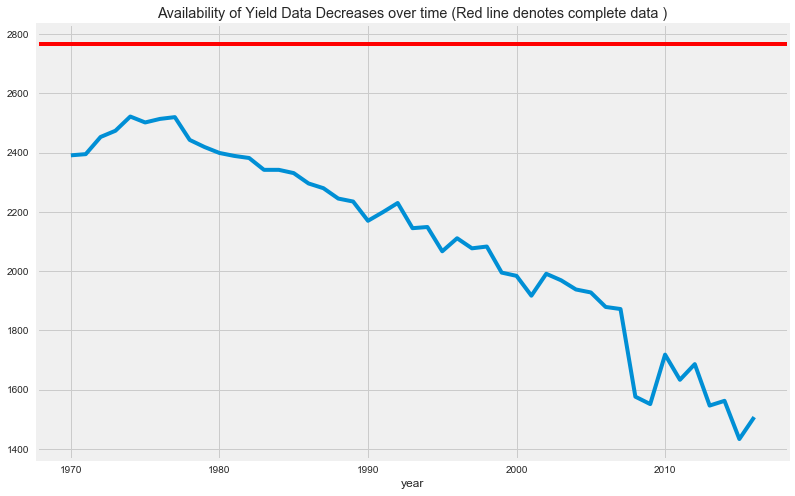

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
plt.axhline(y=ts_df.shape[0], color='r', linestyle='-')
plt.title("Availability of Yield Data Decreases over time (Red line denotes complete data )")
ts_df.count().plot();

In [23]:
complete_data = ts_df.T.count().value_counts()[47]
counties = ts_df.shape[0]
complete_data, counties, complete_data/counties

(812, 2768, 0.29335260115606937)

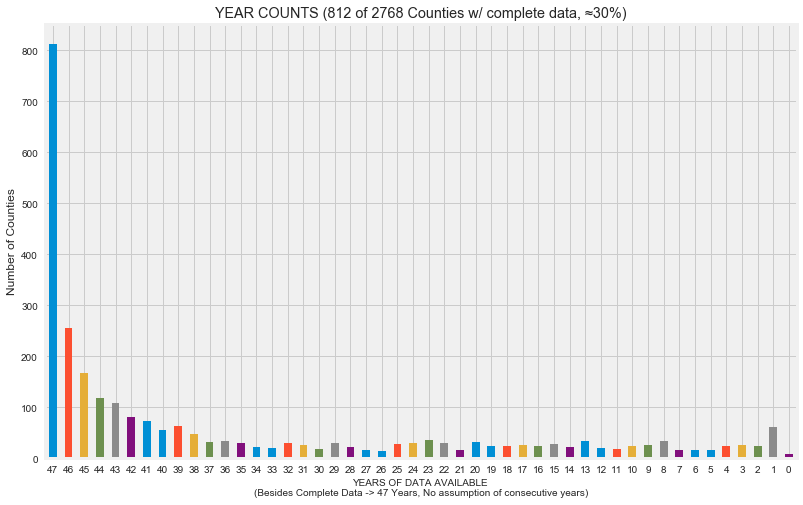

In [24]:
fig, ax= plt.subplots(figsize=(12, 8))

reverse_years = pd.Series(data=list(ts_df.T.count().value_counts().reset_index().sort_values(by="index",ascending=False)[0]), 
                          index=np.arange(0,48)[::-1])
reverse_years.plot(kind="bar", rot=0)
plt.title("YEAR COUNTS (812 of 2768 Counties w/ complete data, ≈30%)")
plt.ylabel("Number of Counties")
plt.xlabel("YEARS OF DATA AVAILABLE \n(Besides Complete Data -> 47 Years, No assumption of consecutive years)", 
           fontsize="medium");
fig.savefig("images/year_counts")

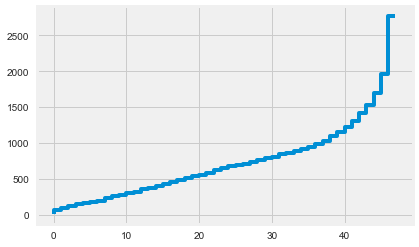

In [25]:
cum_sum = np.cumsum(ts_df.T.count().value_counts().reset_index().sort_values(by="index",ascending=True)[0])
cumulative_sum = np.cumsum(ts_df.T.count().value_counts().reset_index().sort_values(by="index",ascending=False)[0])
plt.step(np.arange(0, 48), cum_sum);

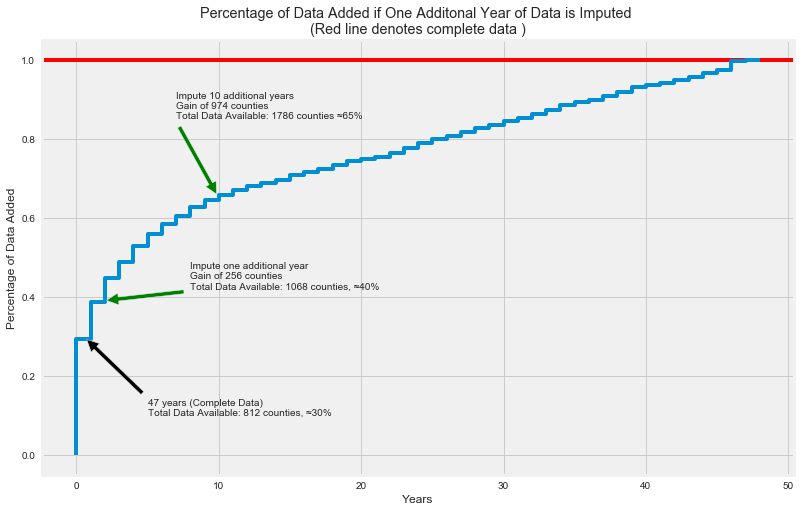

In [27]:
cumulative_sum = np.cumsum(ts_df.T.count().value_counts().reset_index().sort_values(by="index",ascending=False)[0])
cumulative_sum = [0] + cumulative_sum.tolist() 
cumulative_sum = [i/counties for i in cumulative_sum]
fig, ax = plt.subplots(figsize=(12,8))
plt.axhline(y=1, color='r', linestyle='-')
plt.title("Percentage of Data Added if One Additonal Year of Data is Imputed \n(Red line denotes complete data )")
plt.xlabel("Years", size="large")
plt.ylabel("Percentage of Data Added") 
plt.annotate('47 years (Complete Data) \nTotal Data Available: 812 counties, ≈30%', xy=(.5, .30), xytext=(5, .10),
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Impute one additional year \nGain of 256 counties \nTotal Data Available: 1068 counties, ≈40%', 
             xy=(1.8, .39), xytext=(8, .42), arrowprops=dict(facecolor='green', shrink=0.05))
plt.annotate('Impute 10 additional years \nGain of 974 counties \nTotal Data Available: 1786 counties ≈65%', 
             xy=(10, .65), xytext=(7, .85), arrowprops=dict(facecolor='green', shrink=0.05))
plt.step(np.arange(0, 49), cumulative_sum);
fig.savefig("images/cumulative_sum")

In [25]:
# fig, ax= plt.subplots(figsize=(12, 9))
# ts_df.T.count().plot(kind='hist', bins=47*3)
# plt.title("YEAR COUNTS (814 of 2768 Counties w/ complete data, ≈30%)")
# plt.ylabel("Number of Counties")
# plt.xlabel("YEARS OF DATA AVAILABLE \n(Besides Complete Data -> 47 Years \nNo assumption of consecutive years)")
# # plt.legend(["Number of Counties \n ("], loc=9)
# plt.xticks(np.arange(1,48));
# fig.savefig("images/year_counts")

In [28]:
a = pd.DataFrame({"year_count":ts_df.T.count()})
a.head()

,year_count
fips_code,
01001,40
01003,45
01005,44
01007,12
01009,41


In [29]:
a[a.year_count==0]

,year_count
fips_code,
06093,0
16043,0
30031,0
41027,0
41029,0
41055,0
49031,0
53029,0
53057,0


In [30]:
a.to_csv('year_counts_corn.csv')

# Counties with Complete Data

In [31]:
a[a.year_count==47].count()

year_count    812
dtype: int64

# Just under 30% of counties have Complete data

In [32]:
a[a.year_count==47].count()[0]/a.shape[0]

0.29335260115606937

# Check to see how many counties have at least 30 years (consecutive not a requirement)

In [33]:
a[a.year_count>=30].count()

year_count    2003
dtype: int64

# Nearly 73% of counties have >= 30 years data

In [34]:
a[a.year_count>=30].count()[0]/a.shape[0]

0.72362716763005785

In [35]:
full_data = ts_df[ts_df.index.isin(a[a.year_count==47].index.values)]
full_data.head()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


In [36]:
full_data.to_csv("ts_corn_47yr_df.csv")

# States w/ Complete Data

In [37]:
complete_data = corn_yields[corn_yields.fips_code.isin(a[a.year_count==47].index.values)]

complete_data['state_alpha'].unique()

array(['AL', 'AR', 'CA', 'CO', 'DE', 'GA', 'IL', 'IN', 'IA', 'KS', 'KY',
       'LA', 'MD', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NJ', 'NC', 'ND',
       'OH', 'PA', 'SC', 'SD', 'TN', 'TX', 'VA', 'WV', 'WI', 'WY'], dtype=object)

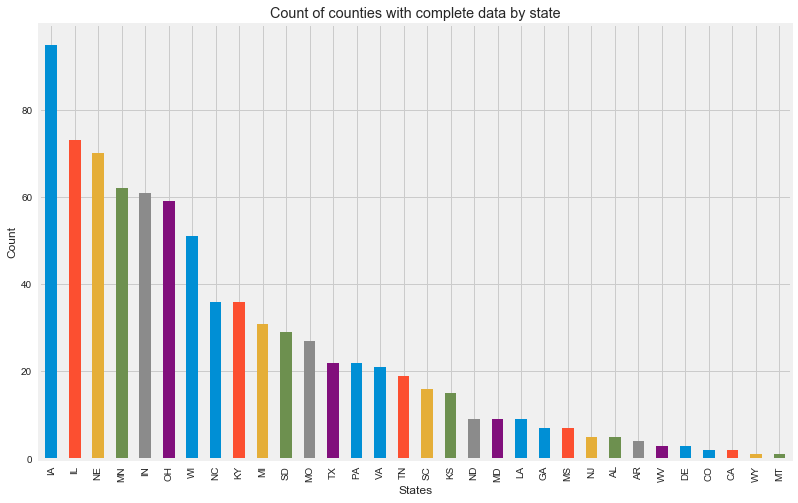

In [38]:
complete_data_states = complete_data['state_alpha'].value_counts()/47
ax = complete_data_states.plot(kind='bar', figsize=(12,8), title="Count of counties with complete data by state")
ax.set(xlabel='States', ylabel='Count');

# How's Iowa looking?

In [39]:
len(corn_yields[['state_alpha','fips_code']][corn_yields.state_alpha == 'IA']['fips_code'].unique())

99

In [40]:
missing_IA_df = corn_yields[~corn_yields.fips_code.isin(a[a.year_count==47].index.values)]
findIA_df = missing_IA_df[missing_IA_df.state_alpha == 'IA'].pivot(index='fips_code', columns='year', values='nassyield')
findIA_df

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19129,81.6,93.0,113.7,108.3,51.7,79.1,95.4,56.3,107.0,122.3,99.0,117.0,103.1,90.0,98.2,128.6,130.2,126.7,107.7,109.4,120.5,131.9,156.0,75.0,147.4,105.9,133.2,135.8,123.7,128.2,135.2,132.5,110.3,131.6,184.8,163.7,159.5,147.4,156.0,191.2,160.2,155.0,128.8,171.0,184.9,188.4
19135,79.0,90.8,103.6,86.9,60.1,72.4,91.8,45.0,90.0,107.1,94.3,114.5,78.6,29.8,91.6,114.5,112.8,107.3,46.6,94.5,112.9,107.2,117.3,61.5,149.0,84.1,112.8,127.2,111.9,110.8,135.8,115.9,158.0,129.6,171.3,154.3,137.0,161.3,136.0,156.3,77.4,112.5,67.3,115.3,175.7,180.0
19173,67.7,92.6,104.5,98.5,32.5,55.0,83.2,65.8,88.7,109.0,65.4,115.0,82.3,44.6,60.6,122.1,115.3,109.5,60.0,95.5,96.6,118.1,127.8,61.6,135.9,65.2,112.8,117.4,119.2,115.6,140.7,114.9,126.6,116.4,157.9,156.8,142.4,137.6,135.0,150.2,122.2,140.5,91.7,136.2,178.8,159.9
19175,77.5,90.8,102.3,96.9,44.6,63.5,94.5,40.3,92.5,108.8,80.7,116.6,90.4,64.0,81.5,125.4,108.5,115.9,67.3,103.0,111.0,124.8,130.0,53.3,143.8,71.8,120.7,117.4,129.7,140.8,136.5,127.3,142.2,106.7,160.4,157.2,153.6,154.1,148.0,153.8,113.2,132.6,87.3,137.0,176.1,183.0


In [41]:
years_set = {i for i in range(1970, 2017)}
years_set.difference(set(findIA_df.columns))

{2015}

# All 4 IOWA counties w/ missing data are missing only one year: 2015

In [42]:
colsIA = [col for col in ts_df.T.columns if str(col).startswith('19')]
pd.DataFrame(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsIA].loc[2015]).T

fips_code,19001,19003,19005,19007,19009,19011,19013,19015,19017,19019,19021,19023,19025,19027,19029,19031,19033,19035,19037,19039,19041,19043,19045,19047,19049,19051,19053,19055,19057,19059,19061,19063,19065,19067,19069,19071,19073,19075,19077,19079,19081,19083,19085,19087,19089,19091,19093,19095,19097,19099,19101,19103,19105,19107,19109,19111,19113,19115,19117,19119,19121,19123,19125,19127,19129,19131,19133,19135,19137,19139,19141,19143,19145,19147,19149,19151,19153,19155,19157,19159,19161,19163,19165,19167,19169,19171,19173,19175,19177,19179,19181,19183,19185,19187,19189,19191,19193,19195,19197
2015,176.5,169.6,175.4,154.3,189.8,187.5,192.9,192.3,203.1,191.6,202.7,193.3,194.7,195.4,193.7,188.8,196.9,209.6,202.8,152.4,202.8,193.2,188.2,199.1,182.4,142.4,162.7,195.8,176.0,194.5,197.0,203.3,191.8,196.5,200.2,179.9,189.0,199.9,179.2,198.1,201.2,199.3,189.5,178.4,202.1,194.8,203.1,199.3,190.6,198.9,168.2,187.1,186.6,181.0,199.0,145.1,189.2,181.7,154.8,196.0,169.6,190.3,178.1,194.9,NaN,202.1,169.0,NaN,185.2,177.7,205.2,204.7,165.8,197.5,203.6,205.5,187.0,204.0,197.8,147.8,204.8,195.9,195.3,201.9,188.0,189.5,NaN,NaN,158.3,159.3,170.3,195.0,158.0,201.0,203.6,185.6,202.3,202.1,198.4


In [43]:
len(colsIA) *47

4653

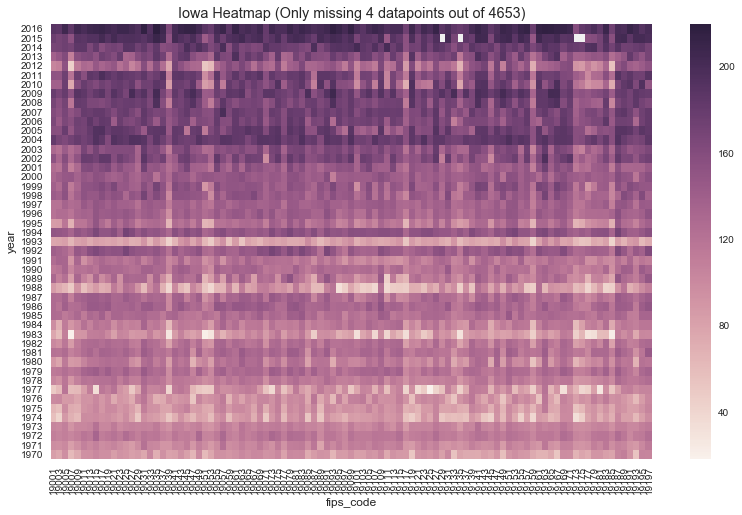

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsIA])
ax.set_title("Iowa Heatmap (Only missing 4 datapoints out of 4653)");
fig.savefig("images/IA_heatmap")

# Heatmap for Alabama

In [46]:
colsAL = [col for col in ts_df.T.columns if str(col).startswith('01')]

AL_counts = a[a.T.columns.isin(colsAL)]["year_count"].sum()
AL_total = len(colsAL)*47
print(AL_counts, AL_total, "missing:", AL_total-AL_counts)
1 - AL_counts/AL_total

2407 3149 missing: 742


0.23563035884407746

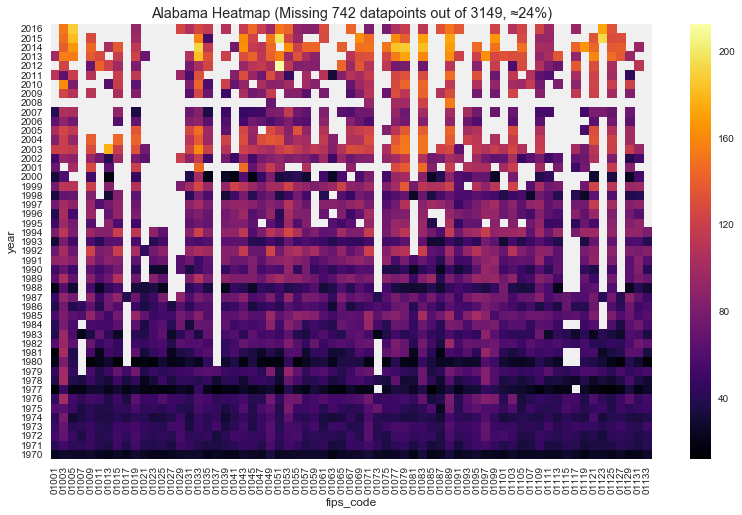

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsAL], cmap="inferno")
ax.set_title("Alabama Heatmap (Missing 742 datapoints out of 3149, ≈24%)");
fig.savefig("images/AL_heatmap")

# Heatmap for California

In [48]:
colsCA = [col for col in ts_df.T.columns if str(col).startswith('06')]

CA_counts = a[a.T.columns.isin(colsCA)]["year_count"].sum()
CA_total = len(colsCA)*47
print(CA_counts, CA_total, "missing:", CA_total-CA_counts)
1 - CA_counts/CA_total

985 2068 missing: 1083


0.52369439071566726

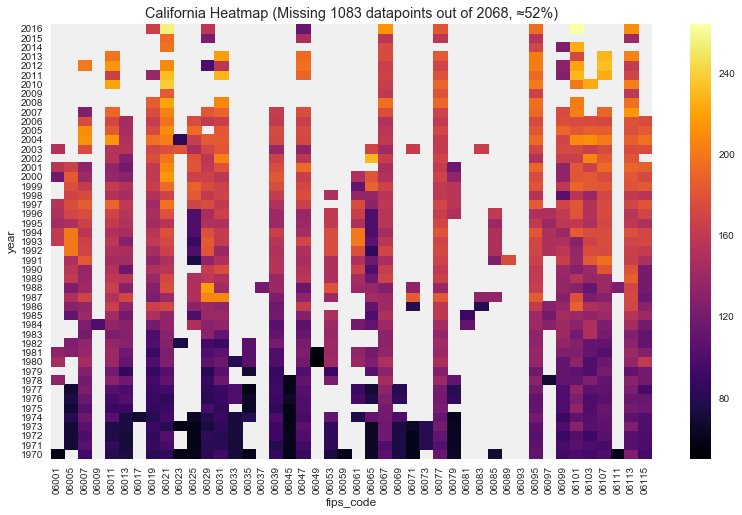

In [49]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1])[colsCA], cmap="inferno")
ax.set_title("California Heatmap (Missing 1083 datapoints out of 2068, ≈52%)");
fig.savefig("images/CA_heatmap")

# Heatmap of all data

In [50]:
total_counts = a.year_count.sum()
total_total = len(a) *47
print(total_counts, total_total, "missing:", total_total-total_counts)
1 - total_counts/total_total

98790 130096 missing: 31306


0.24063768294182752

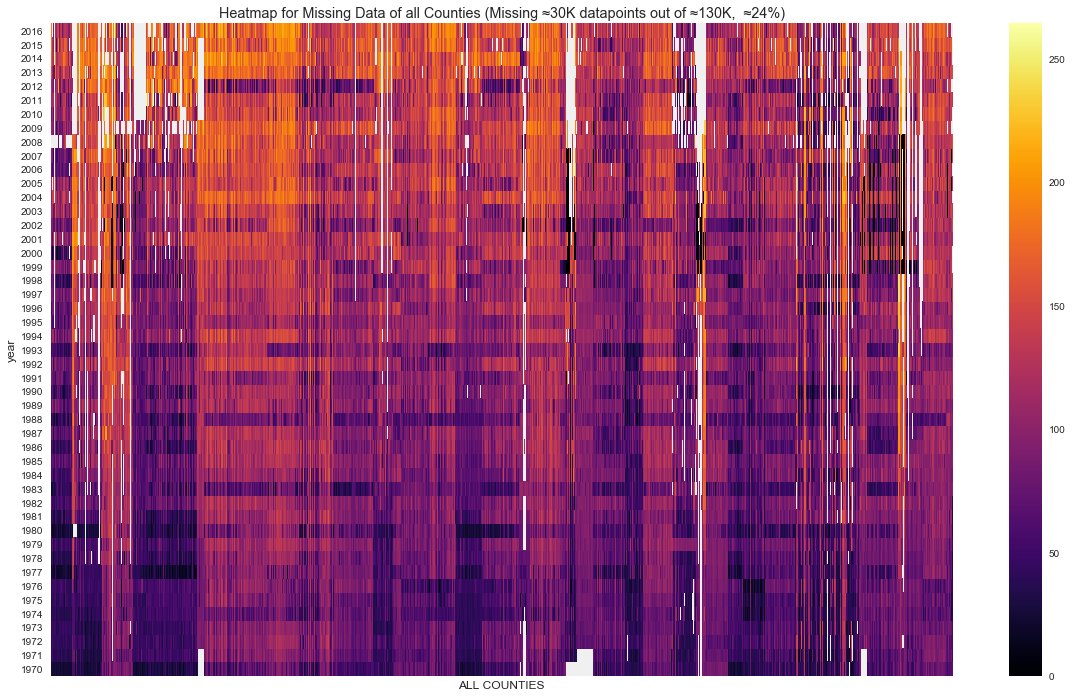

In [28]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(ts_df.T.reindex(index=ts_df.T.index[::-1]), cmap="inferno")
plt.setp(ax, xticks=[], xlabel="ALL COUNTIES")
ax.set_title("Heatmap for Missing Data of all Counties (Missing ≈30K datapoints out of ≈130K,  ≈24%)");
fig.savefig("images/full_heatmap")

___